# Introduction

This notebook is a demo on how to setup a basic Workflow to Work with Jupyter Notebooks

## Install

First install CD4ML package to the development environment

In [1]:
#!pip install git+https://github.com/eduardosan/cd4ml@issue


In [1]:
!python ../setup.py develop
import sys

sys.path.append('../')

/usr/local/lib/python3.9/site-packages/setuptools/dist.py:487: UserWarning: Normalizing '0.0.2
' to '0.0.2'
  warnings.warn(tmpl.format(**locals()))
running develop
running egg_info
writing cd4ml.egg-info/PKG-INFO
writing dependency_links to cd4ml.egg-info/dependency_links.txt
writing requirements to cd4ml.egg-info/requires.txt
writing top-level names to cd4ml.egg-info/top_level.txt
reading manifest file 'cd4ml.egg-info/SOURCES.txt'
writing manifest file 'cd4ml.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.9/site-packages/cd4ml.egg-link (link to .)
Removing cd4ml 0.0.1 from easy-install.pth file
Adding cd4ml 0.0.2 to easy-install.pth file

Installed /usr/src/app/notebooks
Processing dependencies for cd4ml==0.0.2
Finished processing dependencies for cd4ml==0.0.2


Install here your project dependencies por the experiment

In [2]:
%%writefile requirements.txt

feedparser==6.0.10
pandas==1.4.2
openpyxl==3.0.10
nltk==3.7

Overwriting requirements.txt


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 51.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 58.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.0/761.0 KB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 29.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=44b58f71ef02fb5b8e781e8d4c8350b9ef62583bec845d2947181d73c14775af
  Stored in directory: /root/.cache/pip/wheels/65/7a/a7/78c

## Data extraction

For this example we will download some news feed data to use as a dataset. As this is an introductory example just a few news will be used

### Step 1: download data

The goal is to create the case as a multistep feature extraction. First step is to create a function to download data from a service provider

In [4]:
import feedparser
import pandas as pd

def fetch_feed_data(url):

    blog_feed = feedparser.parse(url)
        
    posts = blog_feed.entries  
    post_list = []
        
    for post in posts:
        post_dict = dict()
            
        post_dict["TITLE"] = post.title
        post_dict["CONTENT"] = post.summary
        post_dict["LINK"] = post.link
        post_dict["TIME_PUBLISHED"] = post.published
        # post_dict["TAGS"] = [tag.term for tag in post.tags]
            
        post_list.append(post_dict)
    df_post = pd.DataFrame(post_list)
    return df_post

Now we are going to use this function to define a task using CD4ML

In [5]:
from cd4ml.task import Task

download = Task(name='download', task=fetch_feed_data)

Every task in CD4ML has a method name `run` to excute it with args. Let's test it with a feed we know.

In [6]:
df_g1 = download.run('https://g1.globo.com/rss/g1/')
df_g1

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Homem morre após atirar na mulher e na própria...,"<img src=""https://s2.glbimg.com/KcepBDwue9Qzns...",https://g1.globo.com/pr/oeste-sudoeste/noticia...,"Thu, 30 Jun 2022 16:13:50 -0000"
1,Hospital Allan Kardec mantém leitos SUS por fa...,"<img src=""https://s2.glbimg.com/Y_emz5ahdoe6y0...",https://g1.globo.com/sp/ribeirao-preto-franca/...,"Thu, 30 Jun 2022 16:13:30 -0000"
2,"“No PS, ele recebeu um tratamento dos profissi...","<img src=""https://s2.glbimg.com/w-0KUo5zvehTmH...",https://g1.globo.com/ac/acre/especial-publicit...,"Thu, 30 Jun 2022 16:12:00 -0000"
3,Governador veta projeto de lei que amplia o 't...,"<img src=""https://s2.glbimg.com/I2dCLOkFu8Ql0V...",https://g1.globo.com/mt/mato-grosso/noticia/20...,"Thu, 30 Jun 2022 16:09:58 -0000"
4,Assista ao JA Repórter,"O g1 transmite ao vivo, entrevista com Célio G...",https://g1.globo.com/rs/rio-grande-do-sul/ao-v...,"Thu, 30 Jun 2022 16:09:24 -0000"
5,"VÍDEOS: SP1 de quinta-feira, 30 de junho de 2022","<img src=""https://s2.glbimg.com/1SW7TBSaf6O39Z...",https://g1.globo.com/sp/sao-paulo/videos-sp1/e...,"Thu, 30 Jun 2022 16:09:11 -0000"
6,Navio-patrulha Araguari é aberto para visitaçã...,"<img src=""https://s2.glbimg.com/pXN2KXsl6vW2Lg...",https://g1.globo.com/ce/ceara/noticia/2022/06/...,"Thu, 30 Jun 2022 16:08:53 -0000"
7,Bebê indígena de 1 ano morre vítima de síndrom...,"<img src=""https://s2.glbimg.com/JVNeD-Ya3ET8PI...",https://g1.globo.com/ac/acre/noticia/2022/06/3...,"Thu, 30 Jun 2022 16:07:12 -0000"
8,"VÍDEOS: EPTV 1 Campinas de quinta-feira, 30 de...","<img src=""https://s2.glbimg.com/LyZDDTAf5GZ20V...",https://g1.globo.com/sp/campinas-regiao/playli...,"Thu, 30 Jun 2022 16:06:24 -0000"
9,Comitiva da Alemanha e Reino Unido conhecem be...,"<img src=""https://s2.glbimg.com/PpCkrRSO-zLoG0...",https://g1.globo.com/ac/acre/especial-publicit...,"Thu, 30 Jun 2022 16:06:14 -0000"


### Step 2: create your first workflow

Now that we downloaded the data we can use to create new features. Let's create a workflow to download feeds from differente providers

In [7]:
from cd4ml.task import Task
from cd4ml.workflow import Workflow

download_g1 = Task(name='download_g1', task=fetch_feed_data)
download_g1_brasil = Task(name='download_g1_brasil', task=fetch_feed_data)
download_folha = Task(name='download_folha', task=fetch_feed_data)

run_config = {
    "download_folha": {
        'params': {'url': "https://feeds.folha.uol.com.br/emcimadahora/rss091.xml"},
        'output': 'download_folha'
    },
    "download_g1": {
        'params': {'url': "https://g1.globo.com/rss/g1/"},
        'output': 'download_g1'
    },
    "download_g1_brasil": {
        'params': {'url': "https://g1.globo.com/rss/g1/brasil"},
        'output': 'download_g1_brasil'
    },
}

w = Workflow()
w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
output = w.run(run_config=run_config, executor='local')

When defining a workflow two informations are important for each task: `params` and `outputs`. The first will be used as a parameter to the function; the second will the output vaariable returned by the worklow. Let's check the ouput from first step as a start.

In [8]:
output['download_g1']

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Homem morre após atirar na mulher e na própria...,"<img src=""https://s2.glbimg.com/KcepBDwue9Qzns...",https://g1.globo.com/pr/oeste-sudoeste/noticia...,"Thu, 30 Jun 2022 16:13:50 -0000"
1,Hospital Allan Kardec mantém leitos SUS por fa...,"<img src=""https://s2.glbimg.com/Y_emz5ahdoe6y0...",https://g1.globo.com/sp/ribeirao-preto-franca/...,"Thu, 30 Jun 2022 16:13:30 -0000"
2,"“No PS, ele recebeu um tratamento dos profissi...","<img src=""https://s2.glbimg.com/w-0KUo5zvehTmH...",https://g1.globo.com/ac/acre/especial-publicit...,"Thu, 30 Jun 2022 16:12:00 -0000"
3,Governador veta projeto de lei que amplia o 't...,"<img src=""https://s2.glbimg.com/I2dCLOkFu8Ql0V...",https://g1.globo.com/mt/mato-grosso/noticia/20...,"Thu, 30 Jun 2022 16:09:58 -0000"
4,Assista ao JA Repórter,"O g1 transmite ao vivo, entrevista com Célio G...",https://g1.globo.com/rs/rio-grande-do-sul/ao-v...,"Thu, 30 Jun 2022 16:09:24 -0000"
5,"VÍDEOS: SP1 de quinta-feira, 30 de junho de 2022","<img src=""https://s2.glbimg.com/1SW7TBSaf6O39Z...",https://g1.globo.com/sp/sao-paulo/videos-sp1/e...,"Thu, 30 Jun 2022 16:09:11 -0000"
6,Navio-patrulha Araguari é aberto para visitaçã...,"<img src=""https://s2.glbimg.com/pXN2KXsl6vW2Lg...",https://g1.globo.com/ce/ceara/noticia/2022/06/...,"Thu, 30 Jun 2022 16:08:53 -0000"
7,Bebê indígena de 1 ano morre vítima de síndrom...,"<img src=""https://s2.glbimg.com/JVNeD-Ya3ET8PI...",https://g1.globo.com/ac/acre/noticia/2022/06/3...,"Thu, 30 Jun 2022 16:07:12 -0000"
8,"VÍDEOS: EPTV 1 Campinas de quinta-feira, 30 de...","<img src=""https://s2.glbimg.com/LyZDDTAf5GZ20V...",https://g1.globo.com/sp/campinas-regiao/playli...,"Thu, 30 Jun 2022 16:06:24 -0000"
9,Comitiva da Alemanha e Reino Unido conhecem be...,"<img src=""https://s2.glbimg.com/PpCkrRSO-zLoG0...",https://g1.globo.com/ac/acre/especial-publicit...,"Thu, 30 Jun 2022 16:06:14 -0000"


As we can see it will be necessary to aggregate data from different sources, so we proceed to the next step

### Step 3: dependencies

For the next step it will be necessary to work with **dependency** on the steps. Let's create a new step that uses data from other workflow in order to create an unified dataset. First we create a new function to define a new task and add it to the previous workflow.

In [9]:
import pandas as pd

def aggregate(download_g1, download_g1_brasil, download_folha):  
    return pd.concat([download_g1, download_g1_brasil, download_folha], ignore_index=True)

In [10]:
from cd4ml.task import Task

feeds_aggregate = Task(name='feeds_aggregate', task=aggregate)

The specifics about this step is to make sure dependencies are all declared

In [11]:
w = Workflow()

w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
w.add_task(feeds_aggregate, dependency=['download_g1', 'download_g1_brasil', 'download_folha'])

Let's see the aggregated results after all the steps are executed

In [12]:
run_config = {
    "download_folha": {
        'params': {'url': "https://feeds.folha.uol.com.br/emcimadahora/rss091.xml"},
        'output': 'download_folha'
    },
    "download_g1": {
        'params': {'url': "https://g1.globo.com/rss/g1/"},
        'output': 'download_g1'
    },
    "download_g1_brasil": {
        'params': {'url': "https://g1.globo.com/rss/g1/brasil"},
        'output': 'download_g1_brasil'
    },
    "feeds_aggregate": {
        'params': None,
        'output': 'feeds_aggregate'
    }
}
output = w.run(run_config=run_config, executor='local')

node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done


In [13]:
output['feeds_aggregate']

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,RJ1 NO AR: assista ao vivo pelo g1,"<img src=""https://s2.glbimg.com/XOh3zfVAUY13nG...",https://g1.globo.com/rj/regiao-dos-lagos/ao-vi...,"Thu, 30 Jun 2022 16:02:17 -0000"
1,Polícia divulga fotos e pede ajuda para locali...,"<img src=""https://s2.glbimg.com/Nhqpj4SB7Sh-IX...",https://g1.globo.com/ap/amapa/noticia/2022/06/...,"Thu, 30 Jun 2022 16:01:58 -0000"
2,"VÍDEOS: EPTV 1 Piracicaba desta quinta-feira, ...","<img src=""https://s2.glbimg.com/LyZDDTAf5GZ20V...",https://g1.globo.com/sp/piracicaba-regiao/play...,"Thu, 30 Jun 2022 16:01:54 -0000"
3,Crime ambiental: Usina de Cana-de-Açúcar é mul...,"<img src=""https://s2.glbimg.com/T-5OGrP1GULaJp...",https://g1.globo.com/sp/piracicaba-regiao/noti...,"Thu, 30 Jun 2022 16:01:21 -0000"
4,"VÍDEOS: AL 1 de quinta-feira, 30 de junho","<img src=""https://s2.glbimg.com/7zU_E0bFp4kvgn...",https://g1.globo.com/al/alagoas/playlist/video...,"Thu, 30 Jun 2022 16:00:55 -0000"
...,...,...,...,...
175,Qual sua melhor lembrança do penta? Conte para...,Há 20 anos o brasileiro estava em festa. Em um...,https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 23:26:00 -0300
176,"Após saída de Guimarães, Caixa diz que correge...","Sem qualquer menção ao<a href=""https://www1.fo...",https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 23:23:00 -0300
177,A restrição externa se aproxima,Depois de um longo período menosprezando a res...,https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 23:15:00 -0300
178,Lula e Alckmin combinam seu programa de fim de...,"Em mais um<a href=""https://www1.folha.uol.com....",https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 23:15:00 -0300


### Step 4: feature generation

Now that we have been able to add news from other sources, let's run a simple feature generation process. As the goal is to tokenize the results, let's add a new step to the workflow creating a tokenized version of the content. The final goal is to apply an LDA transformation.

In [14]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [15]:
output['feeds_aggregate']['CONTENT'][0]

'<img src="https://s2.glbimg.com/XOh3zfVAUY13nGfG-vTnTnb7A1U=/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2020/o/H/GPbqkASAiciEg5mp5gyA/rj1-logo.jpg" /><br />   Telejornal também é transmitido diariamente pela internet a partir de 11h45. RJ1 NO AR: assista ao vivo pelo g1 Telejornal também é transmitido diariamente pela internet a partir de 11h45.'

In [16]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

def preprocess_pandas(feeds_aggregate):
    stop = set(stopwords.words('portuguese') + list(string.punctuation))
    stop.update(['http', 'pro', 'https', 't.', 'co'])

    def preprocess(words):
        # Remove HTML marks
        words = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', words)
        tokens = word_tokenize(words)
        tokens = [word for word in tokens if word not in stop]
        tokens = [word for word in tokens if re.search(r'\w+', word) and len(word) > 2]
        return tokens
    
    feeds_aggregate['token_set'] = feeds_aggregate.apply(lambda row: preprocess(row.CONTENT.lower()), axis=1)
    return feeds_aggregate

In [17]:
w = Workflow()

pre = Task(name='preprocess', task=preprocess_pandas)

w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
w.add_task(feeds_aggregate, dependency=['download_g1', 'download_g1_brasil', 'download_folha'])
w.add_task(pre, dependency=['feeds_aggregate'])

In [18]:
run_config = {
    "download_folha": {
        'params': {'url': "https://feeds.folha.uol.com.br/emcimadahora/rss091.xml"},
        'output': 'download_folha'
    },
    "download_g1": {
        'params': {'url': "https://g1.globo.com/rss/g1/"},
        'output': 'download_g1'
    },
    "download_g1_brasil": {
        'params': {'url': "https://g1.globo.com/rss/g1/brasil"},
        'output': 'download_g1_brasil'
    },
    "feeds_aggregate": {
        'params': None,
        'output': 'feeds_aggregate'
    },
    "preprocess": {
        'params': None,
        'output': 'preprocess'
    }
}
output = w.run(run_config=run_config, executor='local')

node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'feeds_aggregate' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'feeds_aggregate' was already marked done


Now we can see a preview with the processed text

In [19]:
output['preprocess']['token_set'][0]

['hoje',
 'pequeno',
 'bryan',
 'lucca',
 'batista',
 'azevedo',
 'nove',
 'meses',
 'braços',
 'mãe',
 'luanny',
 'cristine',
 'araújo',
 'azevedo',
 'sabe',
 'momentos',
 'aflição',
 'desespero',
 'todos',
 'familiares',
 'passaram',
 'saúde',
 'pequeno',
 'bryan',
 'último',
 'dia',
 'junho',
 'luanny',
 'bryan',
 'momento',
 'descontração',
 'cedida',
 'família',
 'família',
 'bryan',
 'buscou',
 'atendimento',
 'várias',
 'clínicas',
 'médicas',
 'particulares',
 'rio',
 'branco',
 'pois',
 'dois',
 'dias',
 'gripe',
 'suspeita',
 'covid-19',
 'quadro',
 'piora',
 'último',
 'dia',
 'iniciando',
 'assim',
 'corrida',
 'busca',
 'cuidados',
 'médicos',
 'pequeno',
 'quiseram',
 'atender',
 'filho',
 'pois',
 'segundo',
 'bryan',
 'covid-19',
 'atendem',
 'pacientes',
 'doença',
 'assim',
 'clínica',
 'médica',
 'particular',
 'atende',
 'doentes',
 'questiona',
 'mãe',
 'pequeno',
 'bryan',
 'segundo',
 'informações',
 'lidas',
 'mídias',
 'sociais',
 'acerca',
 'atendimento',
 'pr

### Step 5: Draw workflow

Let's see the complete workflow dependencies and tasks. 


**Important**: in order for this part to run it is necessary to run pygraphviz installed. Installation and configuration is out of the scope from this notebbok, [but you can see install instructions here](https://pygraphviz.github.io/documentation/stable/install.html).

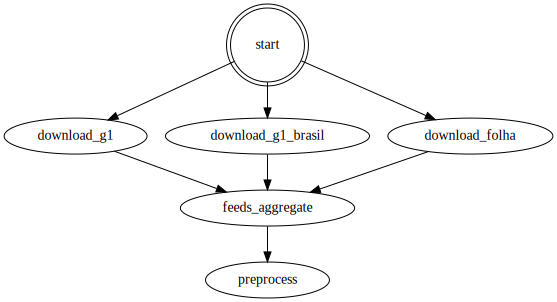

In [20]:
w = Workflow()


w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
w.add_task(feeds_aggregate, dependency=['download_g1', 'download_g1_brasil', 'download_folha'])
w.add_task(pre, dependency=['feeds_aggregate'])

g = w.draw()
g

Save the generated graph to a png file

In [22]:
w.reset()

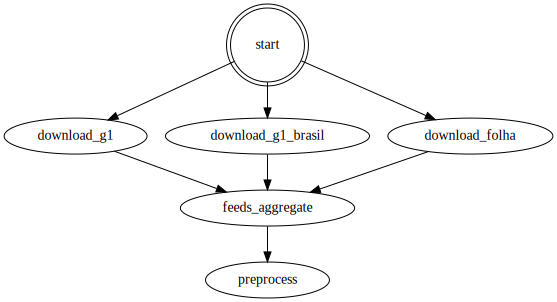

In [23]:
outfile = 'workflow.png'
w.draw(filepath=outfile)